<a href="https://colab.research.google.com/github/dmolinasi/TalentoTechDaniela_Molina/blob/main/Neuronal_Network_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

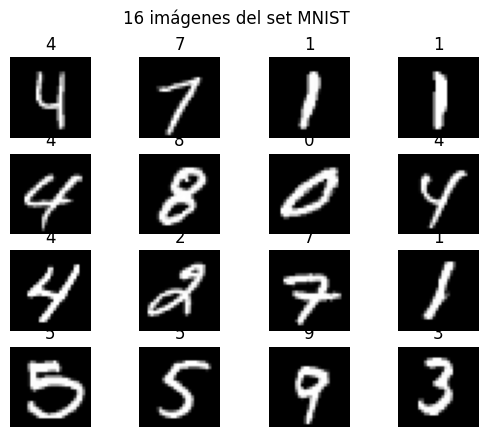

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ids_imgs = np.random.randint(0,x_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

In [ ]:
X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

nclasses = 10
Y_train = to_categorical(y_train, nclasses)
Y_test = to_categorical(y_test, nclasses)

In [ ]:
np.random.seed(1)

In [ ]:
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

In [ ]:
from keras.models import Sequential

modelo = Sequential()

In [ ]:
from keras.layers import Dense

modelo.add( Dense(20, input_dim=input_dim, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))

In [ ]:
modelo.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import SGD

# Use learning_rate instead of lr
sgd = SGD(learning_rate=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
num_epochs = 50

In [ ]:
batch_size = 1024
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/50
59/59 - 1s - 22ms/step - accuracy: 0.7108 - loss: 1.0410
Epoch 2/50
59/59 - 0s - 6ms/step - accuracy: 0.8778 - loss: 0.4483
Epoch 3/50
59/59 - 1s - 10ms/step - accuracy: 0.8959 - loss: 0.3703
Epoch 4/50
59/59 - 1s - 9ms/step - accuracy: 0.9041 - loss: 0.3353
Epoch 5/50
59/59 - 1s - 11ms/step - accuracy: 0.9107 - loss: 0.3150
Epoch 6/50
59/59 - 1s - 11ms/step - accuracy: 0.9149 - loss: 0.2984
Epoch 7/50
59/59 - 1s - 9ms/step - accuracy: 0.9189 - loss: 0.2850
Epoch 8/50
59/59 - 1s - 12ms/step - accuracy: 0.9226 - loss: 0.2741
Epoch 9/50
59/59 - 1s - 17ms/step - accuracy: 0.9248 - loss: 0.2647
Epoch 10/50
59/59 - 1s - 11ms/step - accuracy: 0.9275 - loss: 0.2562
Epoch 11/50
59/59 - 0s - 7ms/step - accuracy: 0.9302 - loss: 0.2476
Epoch 12/50
59/59 - 1s - 11ms/step - accuracy: 0.9324 - loss: 0.2409
Epoch 13/50
59/59 - 1s - 10ms/step - accuracy: 0.9344 - loss: 0.2341
Epoch 14/50
59/59 - 0s - 6ms/step - accuracy: 0.9367 - loss: 0.2274
Epoch 15/50
59/59 - 1s - 11ms/step - accuracy: 0

Text(0.5, 0, 'Iteración')

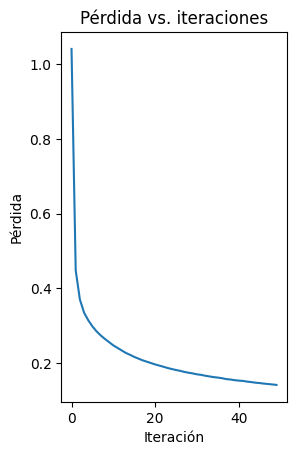

In [ ]:
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

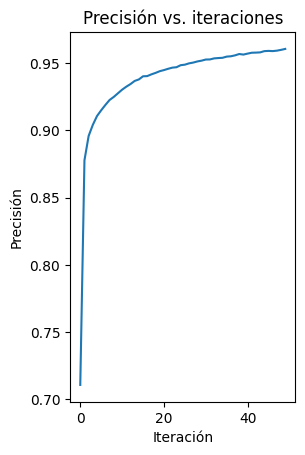

In [ ]:
plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

In [ ]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Exactitud en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Exactitud en el set de validación: 95.5%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


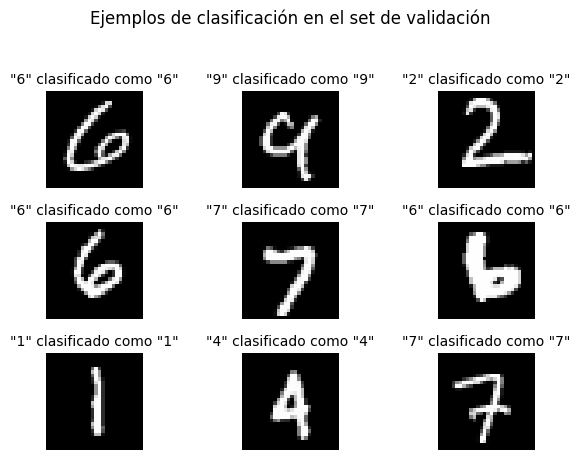

In [ ]:
# Realizar predicciones con el modelo
Y_pred = modelo.predict(X_test)  # Esto devuelve las probabilidades para cada clase

# Convertir las predicciones en clases
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Selección de 9 imágenes aleatorias para visualización
ids_imgs = np.random.choice(range(X_test.shape[0]), 9, replace=False)
for i in range(len(ids_imgs)):
    idx = ids_imgs[i]
    img = X_test[idx, :].reshape(28, 28)
    cat_original = np.argmax(Y_test[idx, :])
    cat_prediccion = Y_pred_classes[idx]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('"{}" clasificado como "{}"'.format(cat_original, cat_prediccion), fontsize=10)

plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta los espacios para que el título no se sobreponga
plt.show()
